## Telecom Churn Case Study

#### Problem Statement:

We need to predict whether a particular customer will churn or not using Usage-based churn.

- Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

#### Purposes:

- This Case study will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

- It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

## Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', 250)

from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [3]:
# Importing all datasets
churn_data = pd.read_csv("telecom_churn_data.csv")
churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
churn_data.shape

(99999, 226)

In [5]:
churn_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [6]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


## 3. Data Cleaning & Preparation

#### Creating response variable

In [7]:
# Adding total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9 to get total usage by user in 9th month

churn_data['Churn'] = churn_data['total_ic_mou_9'] + churn_data['total_og_mou_9'] + churn_data['vol_2g_mb_9'] + churn_data['vol_3g_mb_9']

# If usage in 9th month is zero then we assume that customer has churn else not 
# churn : 1 , not-churn : 0 

churn_data['Churn'] = churn_data['Churn'].apply(lambda usage : 1 if usage == 0 else 0)
round(100 *churn_data['Churn'].value_counts()/len(churn_data), 2)

0    89.81
1    10.19
Name: Churn, dtype: float64

As we can see 10% customer are churning & ~90 are not , this shows that there is high class imbalance present

In [8]:
# Removing columns of 9th month as we have created response variable.

churn_data.drop(churn_data.filter(regex=('._9'), axis=1).columns, axis=1, inplace=True)
churn_data.shape

(99999, 173)

In [9]:
# Getting columns where null values present 
def print_null_value_details(columnwise=True):
    axis=0 if columnwise else 1
    ss = round(100 * churn_data.isnull().sum(axis=axis)/len(churn_data), 2).items()
    for col, null_per in ss:
        if null_per > 0:
            print(col, null_per)
            
print_null_value_details()

loc_og_t2o_mou 1.02
std_og_t2o_mou 1.02
loc_ic_t2o_mou 1.02
last_date_of_month_7 0.6
last_date_of_month_8 1.1
onnet_mou_6 3.94
onnet_mou_7 3.86
onnet_mou_8 5.38
offnet_mou_6 3.94
offnet_mou_7 3.86
offnet_mou_8 5.38
roam_ic_mou_6 3.94
roam_ic_mou_7 3.86
roam_ic_mou_8 5.38
roam_og_mou_6 3.94
roam_og_mou_7 3.86
roam_og_mou_8 5.38
loc_og_t2t_mou_6 3.94
loc_og_t2t_mou_7 3.86
loc_og_t2t_mou_8 5.38
loc_og_t2m_mou_6 3.94
loc_og_t2m_mou_7 3.86
loc_og_t2m_mou_8 5.38
loc_og_t2f_mou_6 3.94
loc_og_t2f_mou_7 3.86
loc_og_t2f_mou_8 5.38
loc_og_t2c_mou_6 3.94
loc_og_t2c_mou_7 3.86
loc_og_t2c_mou_8 5.38
loc_og_mou_6 3.94
loc_og_mou_7 3.86
loc_og_mou_8 5.38
std_og_t2t_mou_6 3.94
std_og_t2t_mou_7 3.86
std_og_t2t_mou_8 5.38
std_og_t2m_mou_6 3.94
std_og_t2m_mou_7 3.86
std_og_t2m_mou_8 5.38
std_og_t2f_mou_6 3.94
std_og_t2f_mou_7 3.86
std_og_t2f_mou_8 5.38
std_og_t2c_mou_6 3.94
std_og_t2c_mou_7 3.86
std_og_t2c_mou_8 5.38
std_og_mou_6 3.94
std_og_mou_7 3.86
std_og_mou_8 5.38
isd_og_mou_6 3.94
isd_og_mou_7 3.86

In [10]:
# Imputing columns with 0 for missing values, considering value is 0 when there is no data available. 

features = ['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 
            'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 
            'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8']

churn_data[features] =churn_data[features].fillna(0)

In [11]:
# deleting columns where missing values are > 70%.
# here min value of the column is zero so missing values are actual missing values and not 0 value.

ss = round(100 * churn_data.isnull().sum(axis=0)/len(churn_data), 2)
for col, null_per in ss.items():
    if null_per > 70:
        churn_data.drop([col], axis=1, inplace=True)

In [12]:
# dropping date columns 
features = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8']
churn_data.drop(features, axis=1, inplace=True)
churn_data.shape

(99999, 146)

In [13]:
# dropping unwanted columns and columns having 0 variance
features = ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 
            'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
            'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']
churn_data.drop(features, axis=1, inplace=True)
churn_data.shape

(99999, 136)

In [14]:
# imputing remaining null values with median
churn_data = churn_data.fillna(churn_data.median())
churn_data.shape

(99999, 136)

In [15]:
round(100 * churn_data.isnull().sum(axis=1)/len(churn_data), 2).any()

False

No Null values present Now

In [16]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 136 entries, mobile_number to Churn
dtypes: float64(109), int64(27)
memory usage: 103.8 MB


Only float and int type present now

In [17]:
# checking Outliers
churn_data.describe(percentiles=[0.10, 0.25, 0.50, 0.60, 0.70, 0.80, 0.90,  0.95, 0.99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn
count,9.999900e+04,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,282.987358,278.536648,279.154731,128.534195,129.760024,127.604651,193.934538,192.981175,190.958243,9.558277,6.873981,6.900761,13.363643,9.439823,9.435597,45.715288,45.127633,44.050781,91.282541,89.430290,88.991071,3.603334,3.646613,3.480

In [18]:
#find top 70 customer
#Total_amount_spend_rech_6 = (total_rechange_data_6 * average_rech_amt_data_6) + total_rech_amount_6_calls
#Total_amount_spend_rech_7 = (total_rechange_data_7 * average_rech_amt_data_7) + total_rech_amount_7_calls

#top70 customer = avg(Total_amount_spend_rech_6 + Total_amount_spend_rech_7) > 70 percentile
#imbalance data handling using smote
#https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18

#or class weight in random forest

## Filtering High Value Customers

In [19]:
churn_data['Total_amount_spend_rech_6'] = (churn_data['total_rech_data_6']*churn_data['av_rech_amt_data_6'])+ churn_data['total_rech_amt_6']
churn_data['Total_amount_spend_rech_7'] = (churn_data['total_rech_data_7']*churn_data['av_rech_amt_data_7'])+ churn_data['total_rech_amt_7']
churn_data['total_amt'] = (churn_data['Total_amount_spend_rech_6']+churn_data['Total_amount_spend_rech_7'])/2

In [20]:
#as new derived feature is created lets remove the variables from the data set
features = ['Total_amount_spend_rech_6','total_rech_data_6','av_rech_amt_data_6','total_rech_amt_6','Total_amount_spend_rech_7','total_rech_data_7','av_rech_amt_data_7','total_rech_amt_7','mobile_number']
churn_data.drop(features, axis = 1, inplace = True)

In [21]:
churn_data.shape

(99999, 130)

In [22]:
churn_data.total_amt.describe(percentiles=[0.70])

count    99999.000000
mean       485.328068
std        869.423594
min          0.000000
50%        275.000000
70%        478.000000
max      61236.000000
Name: total_amt, dtype: float64

In [23]:
churn_data = churn_data[churn_data['total_amt'] >= 478]
churn_data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn,total_amt
0,197.385,214.816,213.803,34.31,32.33,0.00,96.31,91.735,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.91,11.61,0.00,41.03,40.43,0.00,0.00,0.00,0.00,0.0,0.0,0.00,65.11,63.685,0.00,0.00,0.00,0.00,3.95,3.635,0.00,0.00,0.00,0.00,11.64,11.09,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,15.69,15.74,0.16,56.49,57.08,4.13,0.88,0.93,1.15,92.16,92.55,5.44,0.00,0.00,0.00,2.03,2.04,0.00,0.00,0.00,0.00,5.89,5.96,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,252,252,252,252,252,252,252,1.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,3.58,1,559.0
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.160,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.910,255.79,4.30,23.29,12.01,49.89,31.760,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,1,1185.0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.630,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.180,63.04,116.56,133.43,22.58,13.69,10.040,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,120,90,154,30,50,0,10,3.0,0.0,154.0,23.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.00,0,696.0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.680,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0

In [24]:
#Churn Rate
round(100 *churn_data['Churn'].value_counts()/len(churn_data), 2)

0    91.86
1     8.14
Name: Churn, dtype: float64

# Exploratory Data Analyis 

Filter categorical variables

In [25]:
for column in churn_data.columns.tolist():
    if churn_data[column].value_counts().count() <= 10 :
        print(column)

monthly_2g_6
monthly_2g_7
monthly_2g_8
Churn


Looks like there are no categorical features except churn

In [26]:
churn_data.shape

(30001, 130)

## Univariate Analysis

In [27]:
# As all the features are continious variables lets look at the distribution of data
sns.set(style="darkgrid")


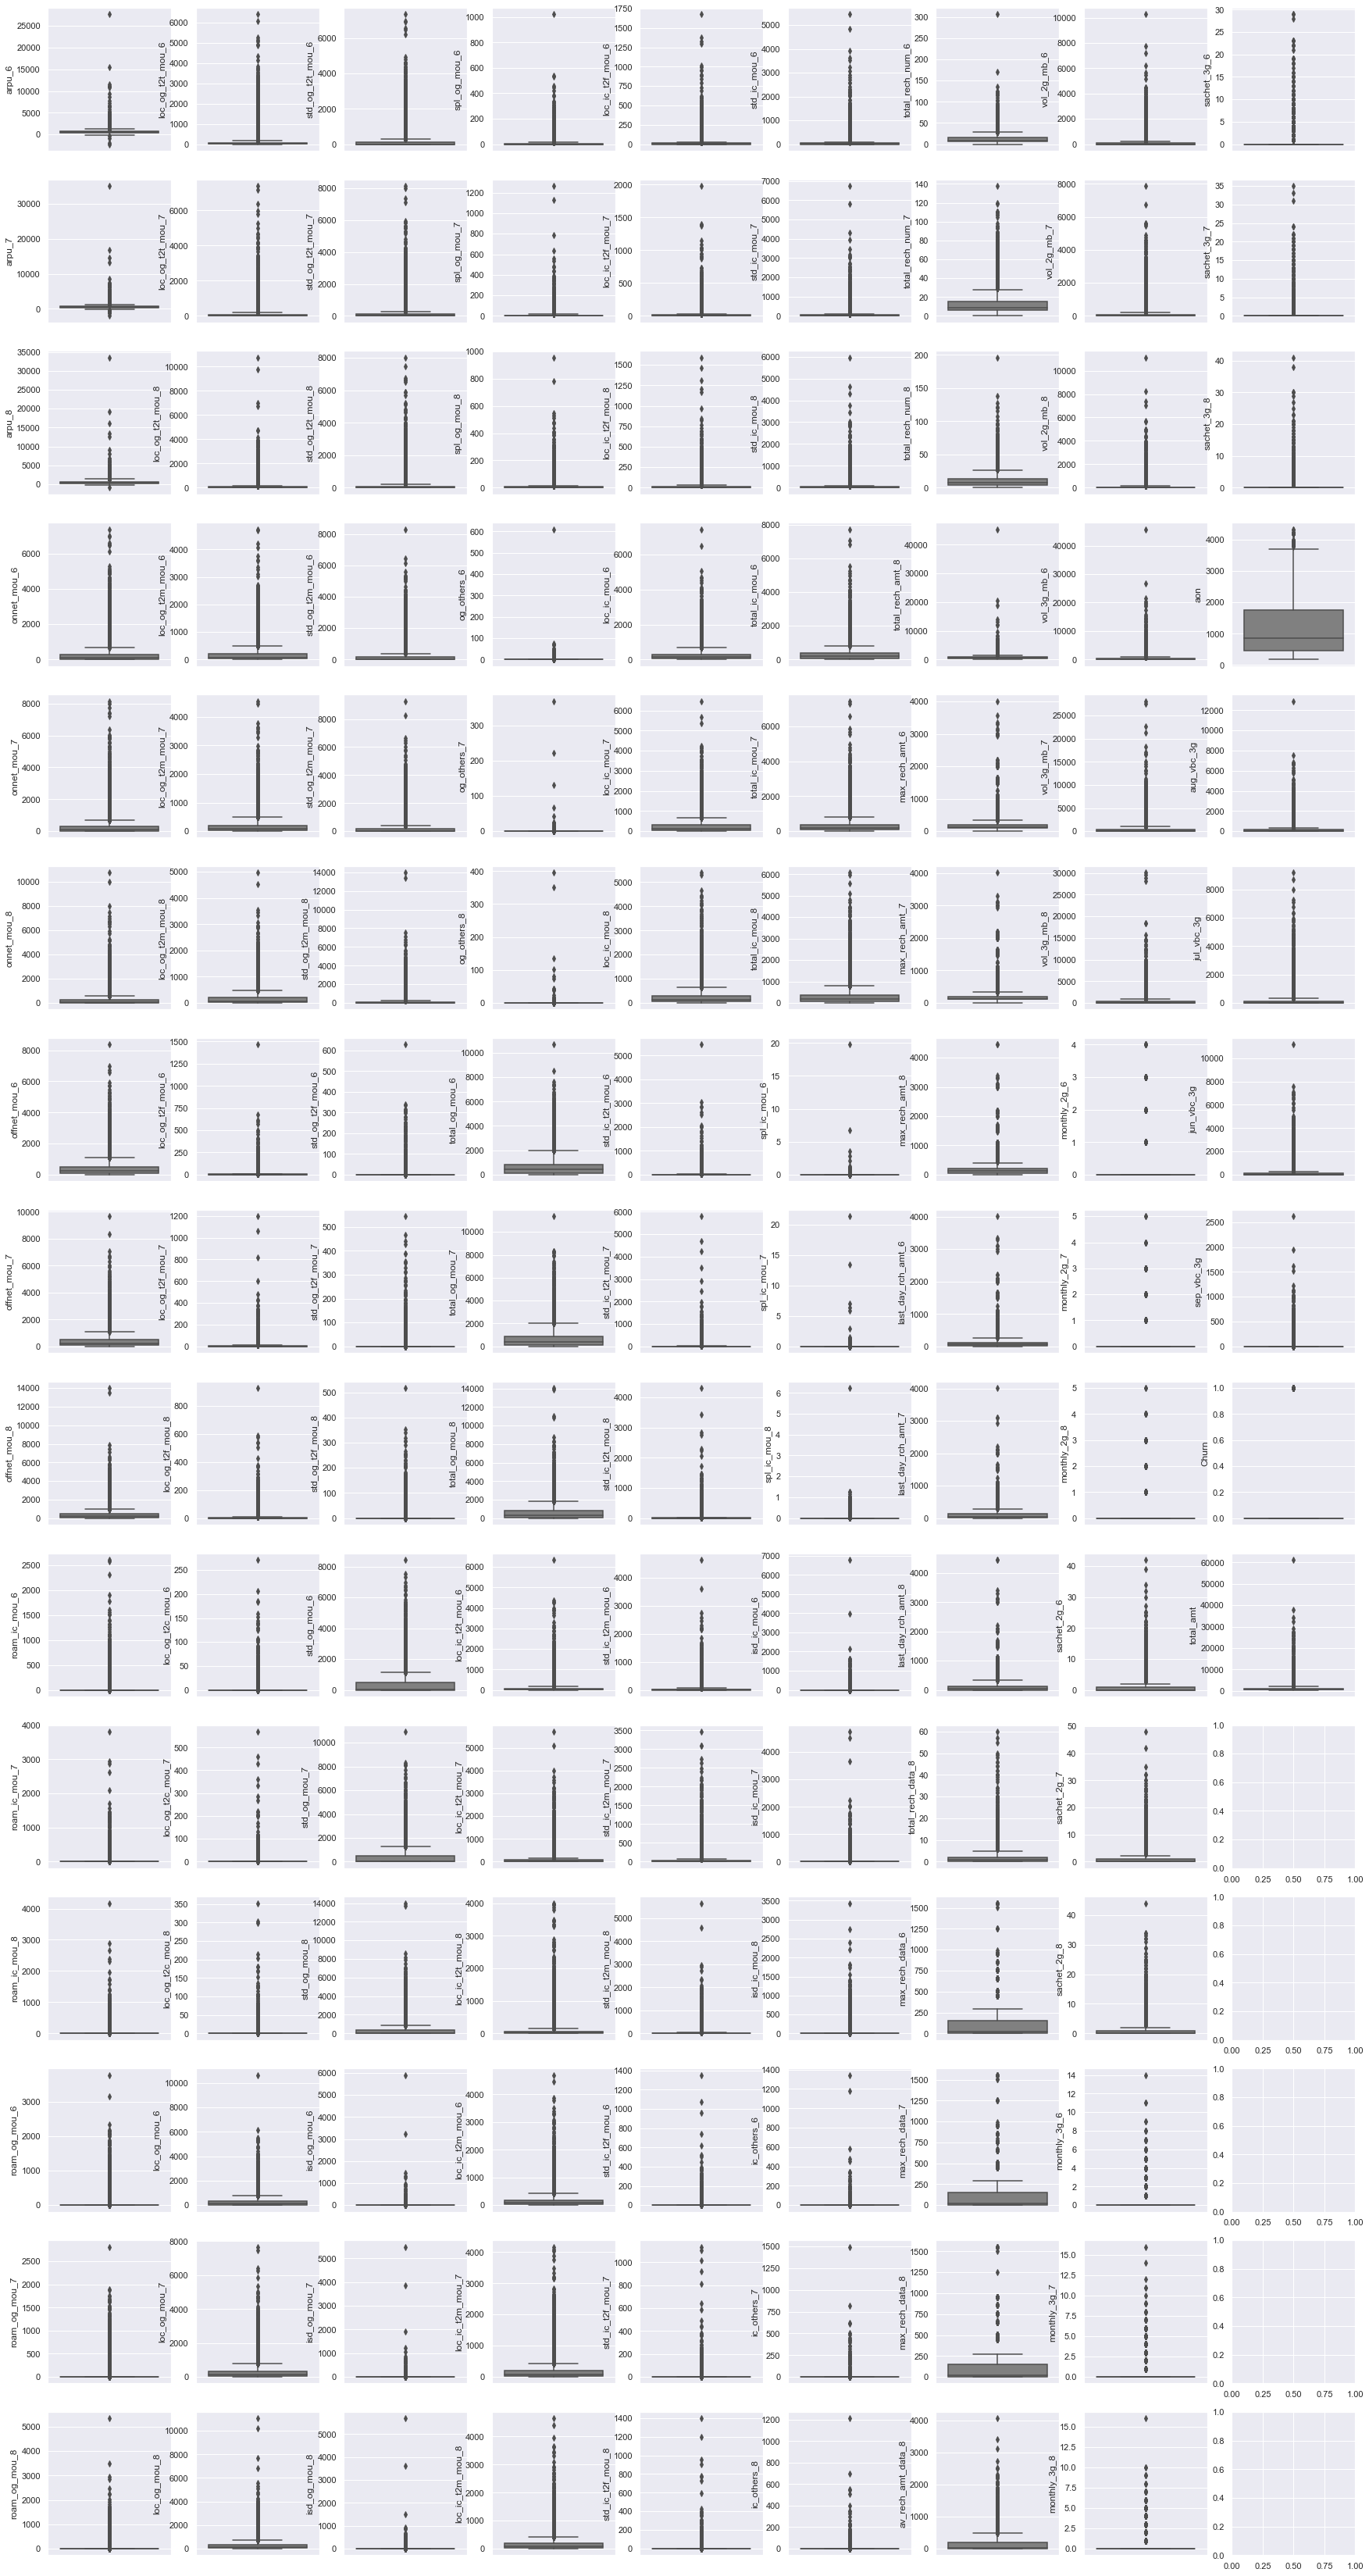

In [34]:
f, axes = plt.subplots(15,9 , figsize=(30, 60), sharex = False)
for i,col in enumerate(churn_data.columns.tolist()):
    sns.boxplot(y= churn_data[col], color="grey",ax=axes[i%15, i//15])


## Bivariate Analysis 

Lets See how churn will impa

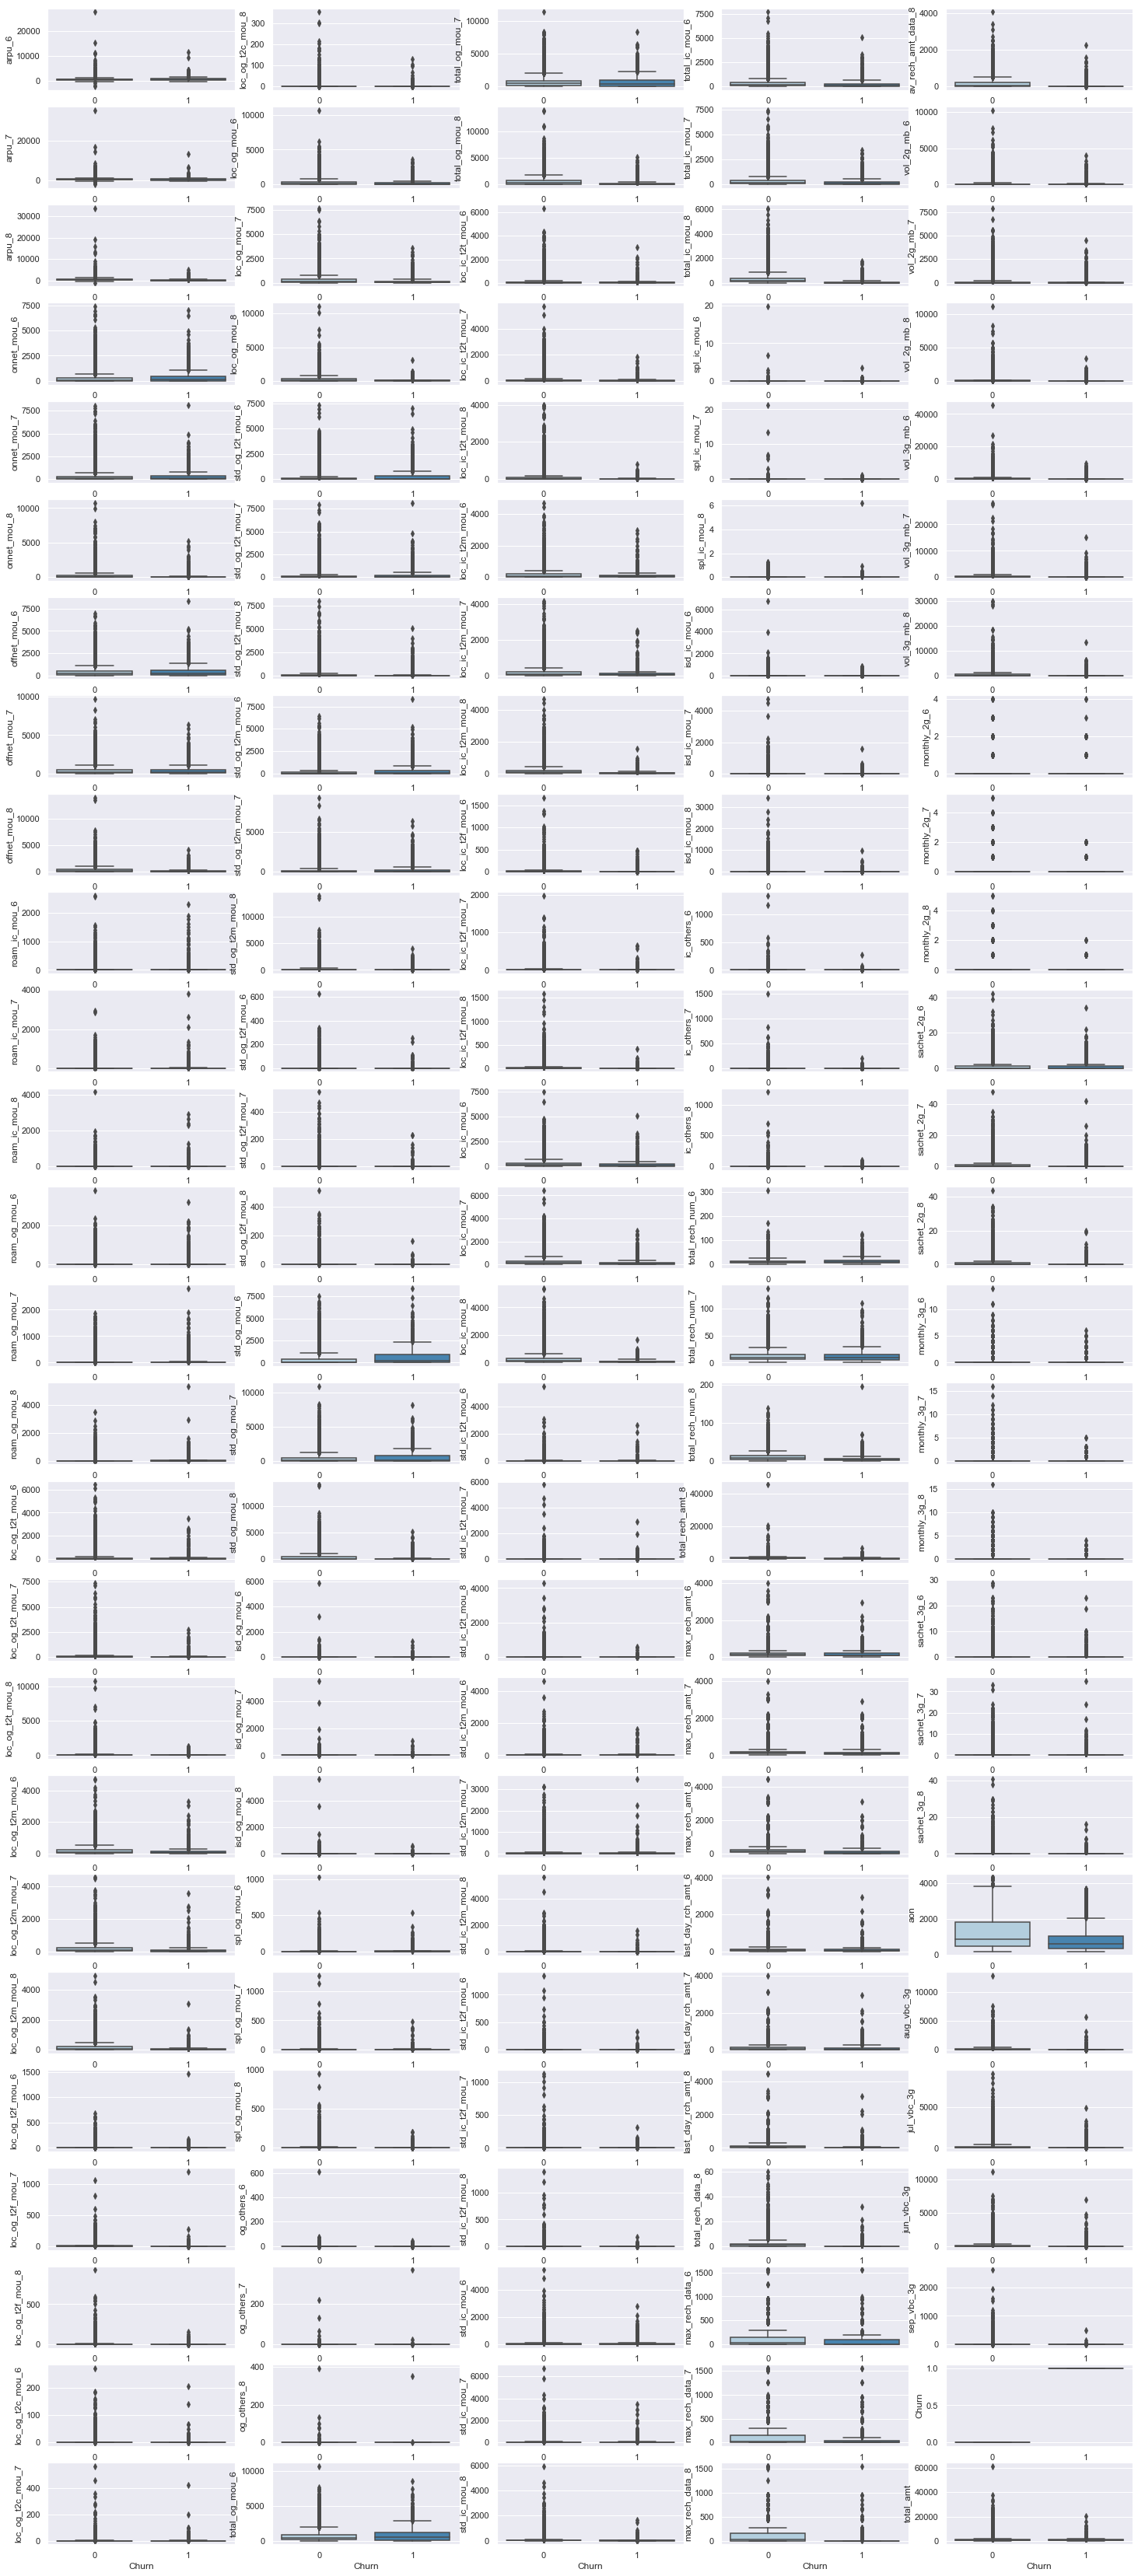

In [35]:
f, axes = plt.subplots(26,5 , figsize=(25, 60), sharex = False)
for i,col in enumerate(churn_data.columns.tolist()):
    sns.boxplot(y= churn_data[col],x = churn_data['Churn'] ,palette="Blues",ax=axes[i%26, i//26])


# Model Building

In [37]:
#Splitting the data into train and test
Train , Test = train_test_split(churn_data, train_size=0.8, test_size=0.2, random_state=100)

### Building Logistic Regression

In [150]:
X_train = Train.drop('Churn',axis = 1)
y_train = Train.Churn
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns

In [39]:
X_test = Test.drop('Churn',axis = 1)
y_test = Test.Churn

In [40]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [41]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
lr = LogisticRegression(class_weight='balanced')

In [44]:
lr.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [45]:
y_train_pred = lr.predict(X_train)

In [46]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score

In [47]:
def Logistic_metrics(X, Y):
    print('Accuracy Score:', accuracy_score(y_true = X,y_pred = Y))
    print('*'*50)
    print('Confusion Matrix')
    print(confusion_matrix(y_true = X,y_pred = Y))
    print('*'*50)
    print(classification_report(y_true = X,y_pred = Y))

In [48]:
#Train data metrics
Logistic_metrics(y_train, lr.predict(X_train))

Accuracy Score: 0.8077083333333334
**************************************************
Confusion Matrix
[[17783  4301]
 [  314  1602]]
**************************************************
              precision    recall  f1-score   support

           0       0.98      0.81      0.89     22084
           1       0.27      0.84      0.41      1916

    accuracy                           0.81     24000
   macro avg       0.63      0.82      0.65     24000
weighted avg       0.93      0.81      0.85     24000



In [57]:
#metrics for train set
Logistic_metrics(y_test, lr.predict(X_test))

Accuracy Score: 0.820863189468422
**************************************************
Confusion Matrix
[[4485  991]
 [  84  441]]
**************************************************
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      5476
           1       0.31      0.84      0.45       525

    accuracy                           0.82      6001
   macro avg       0.64      0.83      0.67      6001
weighted avg       0.92      0.82      0.85      6001



If we look at the metrics the accuracy shows around 94% but recall value shows 14%. Lets improve the model performance by applying cross validation techniques

In [58]:
# As we have more fetures lets use lasso regression as it has the ability of feature selection

In [117]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# As we have more fetures lets use lasso regression as it has the ability of feature selection

params = {'alpha': [0.00005 ,0.0001, 0.0005, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 5,2, 5.5, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 33 candidates, totalling 165 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.0005, 0.001, 0.01, 0.05,
                                   0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0, 2.0, 3.0, 4.0, 5.0, 5, 2, 5.5, 6.0, 7.0,
                                   8.0, 9.0, 10.0, 20, 50, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [118]:
alpha = model_cv.best_params_['alpha']
alpha

5e-05

In [119]:
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=5e-05)

In [120]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

In [121]:
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_test = pd.DataFrame(y_pred_test)

In [122]:
y_pred_train = y_pred_train[0].map(lambda x : 1 if x > 0.5 else 0)
y_pred_test = y_pred_test[0].map(lambda x : 1 if x > 0.5 else 0)

In [123]:
#Train data metrics
Logistic_metrics(y_pred_train, lr.predict(X_train))

Accuracy Score: 0.7578333333333334
**************************************************
Confusion Matrix
[[18097  5812]
 [    0    91]]
**************************************************
              precision    recall  f1-score   support

           0       1.00      0.76      0.86     23909
           1       0.02      1.00      0.03        91

    accuracy                           0.76     24000
   macro avg       0.51      0.88      0.45     24000
weighted avg       1.00      0.76      0.86     24000



In [124]:
#metrics for train set
Logistic_metrics(y_pred_test, lr.predict(X_test))

Accuracy Score: 0.7660389935010832
**************************************************
Confusion Matrix
[[4569 1404]
 [   0   28]]
**************************************************
              precision    recall  f1-score   support

           0       1.00      0.76      0.87      5973
           1       0.02      1.00      0.04        28

    accuracy                           0.77      6001
   macro avg       0.51      0.88      0.45      6001
weighted avg       1.00      0.77      0.86      6001



# PCA

In [59]:
from sklearn.decomposition import PCA 

In [60]:
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

In [61]:
pca.components_

array([[ 2.96582383e-03,  1.46148784e-03,  4.95718711e-03, ...,
         1.27131395e-02,  2.20103751e-03, -5.84201212e-03],
       [ 3.04839676e-02,  2.60528650e-02,  2.49489729e-02, ...,
        -6.62863285e-02, -7.02710025e-03, -2.07931176e-02],
       [ 2.77904597e-02,  2.42576806e-02,  2.92330762e-02, ...,
         4.89085889e-02,  6.44893427e-03,  2.70216255e-02],
       ...,
       [-1.44273817e-07, -4.37301147e-07, -3.96513437e-07, ...,
         1.75175432e-08,  1.07757589e-07, -7.60891422e-08],
       [ 2.99540460e-07,  3.76599521e-07, -3.94868729e-07, ...,
        -3.14682625e-08,  1.24165177e-08, -1.23564937e-07],
       [-0.00000000e+00,  9.01804405e-16, -7.41684049e-16, ...,
         1.69286788e-17, -9.62902334e-19, -4.55579951e-17]])

In [62]:
pca.explained_variance_ratio_

array([2.13446105e-01, 1.33715039e-01, 9.02888020e-02, 7.24652410e-02,
       5.63442061e-02, 4.35788048e-02, 3.91445987e-02, 2.88455800e-02,
       2.17181510e-02, 1.93105520e-02, 1.82961318e-02, 1.63962833e-02,
       1.40330864e-02, 1.28632912e-02, 1.12745759e-02, 1.06731363e-02,
       9.80800819e-03, 9.37203960e-03, 9.18707323e-03, 8.79846566e-03,
       8.21978658e-03, 7.91009000e-03, 7.63430552e-03, 7.40130503e-03,
       6.76984939e-03, 6.61582794e-03, 6.35062656e-03, 6.16170193e-03,
       5.67354403e-03, 4.46378646e-03, 4.26686085e-03, 4.23691573e-03,
       3.94442787e-03, 3.76784049e-03, 3.62656555e-03, 3.35370183e-03,
       2.93657715e-03, 2.86972942e-03, 2.55848656e-03, 2.50917376e-03,
       2.35399536e-03, 2.28799440e-03, 2.21298883e-03, 2.12235005e-03,
       2.09461097e-03, 2.04378756e-03, 1.98750366e-03, 1.97077885e-03,
       1.88460614e-03, 1.84919037e-03, 1.79912253e-03, 1.70763432e-03,
       1.62887057e-03, 1.60080746e-03, 1.54512806e-03, 1.46397902e-03,
      

<BarContainer object of 129 artists>

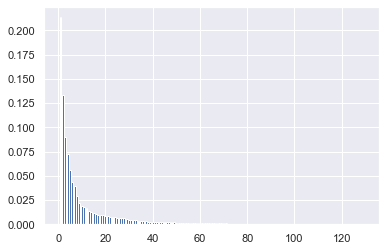

In [63]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [64]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

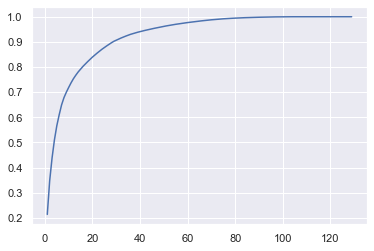

In [65]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)

In [66]:
PC_45 = PCA(n_components=45, random_state=42)

In [67]:
PC_final = PC_45.fit_transform(X_train)
PC_final = pd.DataFrame(PC_final)
PC_final

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
0,0.520871,0.003958,-0.299382,-0.034478,0.014679,-0.117843,-0.026496,0.015305,-0.020598,-0.005687,0.089985,0.006179,0.003689,0.018905,-0.043182,0.023671,-0.058607,-0.007186,0.053497,-0.049794,0.012495,-0.005396,0.010738,-0.027724,-0.056042,-0.054813,0.002245,-0.049900,-0.025351,0.201597,-0.002152,0.077611,-0.112351,0.018951,-0.092023,-0.056938,-0.010008,-0.021842,-0.036309,0.019875,-0.003696,-0.017823,0.009510,-0.002241,0.000789
1,0.345539,0.055741,-0.081802,-0.065172,0.028782,-0.147065,0.010034,-0.080844,0.011233,0.008395,0.154693,-0.033882,0.014524,0.036378,-0.068883,0.014011,-0.022645,-0.067209,0.032194,-0.008295,-0.028039,0.011805,0.008478,-0.025653,-0.016817,-0.000984,-0.002597,0.016134,0.002791,0.010836,0.025366,0.006888,-0.125533,-0.053658,0.009833,-0.007485,-0.012691,-0.000172,-0.012731,0.017717,0.003476,-0.013291,-0.006737,0.010784,-0.006096
2,-0.199368,-0.178866,-0.034401,-0.032882,0.104656,-0.130663,-0.051681,0.001822,0.003123,-0.023266,-0.021067,0.007130,0.054022,-0.052585,0.027049,0.024671,-0.037605,-0.004269,0.022884,-0.020947,0.013297,-0.007216,-0.051786,0.051839,-0.021620,0.072536,-0.012133,0.066831,0.003786,-0.017014,0.002950,-0.006353,-0.003760,0.004883,-0.002749,0.002265,-0.001608,0.001997,0.027512,-0.006877,0.008554,0.008453,-0.003613,0.004787,-0.009775
3,-0.150317,-0.026166,0.064883,-0.043788,-0.061147,-0.013645,0.008503,0.004675,0.066657,0.067257,-0.059809,-0.029942,-0.183863,0.043290,0.012970,0.022871,0.001948,-0.012414,0.025920,-0.012064,-0.046153,-0.001259,-0.002367,0.002711,0.010476,0.000546,0.026421,0.019846,-0.001497,-0.002007,-0.026079,-0.008748,0.008362,0.013386,-0.013230,-0.017748,0.003277,0.003271,-0.016987,-0.006087,0.006260,-0.002641,-0.012266,-0.003768,0.008828
4,0.166388,-0.167693,-0.067648,0.118373,-0.147651,-0.073835,-0.010421,-0.012710,-0.012382,-0.072129,0.008808,0.001327,0.130061,0.003762,-0.030219,-0.029727,0.009532,-0.018669,-0.003284,-0.016094,-0.003588,-0.049298,-0.011668,0.003015,0.004566,-0.009841,-0.002117,0.015304,-0.008467,0.013942,0.001545,0.003419,0.045539,-0.008785,0.012717,0.014981,-0.004984,-0.004292,0.010546,-0.007600,0.004662,0.006842,0.000819,-0.000263,-0.012185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,-0.087757,-0.282457,0.009674,0.199388,-0.183114,0.002029,-0.008418,-0.020821,-0.135084,-0.279677,0.082832,0.009916,0.034556,-0.049420,0.043004,0.129164,0.141333,-0.037816,-0.049216,0.001764,0.010274,0.133971,0.020675,0.008723,-0.001994,-0.016587,0.004428,-0.025784,-0.000412,0.002492,0.001099,-0.025529,0.009506,-0.011885,0.000131,0.006804,-0.002684,0.002927,-0.017861,0.009180,0.008501,-0.019184,0.028297,0.014056,-0.025287
23996,0.238531,0.287165,-0.054679,0.079034,0.020152,0.019851,-0.066850,0.067712,0.100082,-0.021887,0.140327,0.040534,-0.001188,0.032270,0.067116,-0.041996,-0.008244,0.012446,-0.004842,0.007563,0.048260,0.006648,0.002688,-0.015000,0.000608,-0.011408,0.039374,0.008106,-0.046541,0.026723,0.012554,0.000099,-0.037272,-0.021390,0.036192,0.056174,0.088650,0.023757,-0.002401,-0.001745,-0.053396,-0.024451,-0.004768,0.000854,-0.030388
23997,-0.185047,-0.199779,0.002959,0.011022,-0.108745,-0.115539,-0.058087,0.022449,-0.083677,-0.194301,0.032801,0.005738,0.003776,-0.043725,0.018718,0.015716,-0.028656,0.020874,0.036260,-0.028936,0.007223,-0.008404,-0.013043,0.000485,0.006495,-0.015987,0.002130,-0.035630,-0.004892,0.020241,-0.003811,0.009349,-0.033293,0.013466,-0.012795,-0.005252,0.005854,-0.010116,0.045146,-0.012715,0.008097,0.006975,-0.019420,-0.001573,-0.004398
23998,-0.153640,0.129615,0.104716,-0.121398,-0.035509,-0.075146,0.090708,-0.218050,-0.095139,0.010475,-0.167504,-0.041976,-0.008735,0.083722,-0.001310,0.038670,0.031747,-0.027163,0.067639,0.046056,0.029082,-0.040966,0.091041,0.052283,-0.0

# Logistic Regression with PCA

In [70]:
LR_PCA = LogisticRegression(class_weight='balanced').fit(PC_final,y_train)

In [71]:
#Train Metrics
Logistic_metrics(y_train,LR_PCA.predict(PC_final))

Accuracy Score: 0.79625
**************************************************
Confusion Matrix
[[17520  4564]
 [  326  1590]]
**************************************************
              precision    recall  f1-score   support

           0       0.98      0.79      0.88     22084
           1       0.26      0.83      0.39      1916

    accuracy                           0.80     24000
   macro avg       0.62      0.81      0.64     24000
weighted avg       0.92      0.80      0.84     24000



In [78]:
#Test Metrics
Logistic_metrics(y_test,LR_PCA.predict(PC_45.transform(X_test)))

Accuracy Score: 0.8126978836860523
**************************************************
Confusion Matrix
[[4438 1038]
 [  86  439]]
**************************************************
              precision    recall  f1-score   support

           0       0.98      0.81      0.89      5476
           1       0.30      0.84      0.44       525

    accuracy                           0.81      6001
   macro avg       0.64      0.82      0.66      6001
weighted avg       0.92      0.81      0.85      6001



In [74]:
import xgboost as xgb

# Predictive model Using XGBoost

In [79]:
#Default paranaters
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
xgb_cfl.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [80]:
#Train the model using PCA features
xgb_cfl.fit(PC_final, y_train)

[22:20:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [82]:
#Train Metrics 
Logistic_metrics(y_train,xgb_cfl.predict(PC_final))

Accuracy Score: 0.9974583333333333
**************************************************
Confusion Matrix
[[22082     2]
 [   59  1857]]
**************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22084
           1       1.00      0.97      0.98      1916

    accuracy                           1.00     24000
   macro avg       1.00      0.98      0.99     24000
weighted avg       1.00      1.00      1.00     24000



In [83]:
#Test Metrics 
Logistic_metrics(y_test,xgb_cfl.predict(PC_45.transform(X_test)))

Accuracy Score: 0.9233461089818363
**************************************************
Confusion Matrix
[[5394   82]
 [ 378  147]]
**************************************************
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5476
           1       0.64      0.28      0.39       525

    accuracy                           0.92      6001
   macro avg       0.79      0.63      0.67      6001
weighted avg       0.91      0.92      0.91      6001



# Parameter Tuning for XGBoost

In [129]:
# A parameter grid for XGBoost
params = {
        'n_estimators' : [100, 200, 500, 750], # no of trees 
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],  # eta
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12]
        }

random_search = RandomizedSearchCV(xgb_cfl, param_distributions=params, scoring='accuracy', n_jobs=-1, cv=5, verbose=3, random_state=42)


In [133]:
random_search.fit(PC_final,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[23:25:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=-1,
                                           num_p...
                                           tree_method='exact',
                                           validate_parameters=1,
      

In [135]:
Logistic_metrics(y_train,random_search.predict(PC_final))

Accuracy Score: 0.949375
**************************************************
Confusion Matrix
[[21954   130]
 [ 1085   831]]
**************************************************
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     22084
           1       0.86      0.43      0.58      1916

    accuracy                           0.95     24000
   macro avg       0.91      0.71      0.78     24000
weighted avg       0.95      0.95      0.94     24000



In [136]:
Logistic_metrics(y_test,random_search.predict(PC_45.transform(X_test)))

Accuracy Score: 0.9238460256623896
**************************************************
Confusion Matrix
[[5408   68]
 [ 389  136]]
**************************************************
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5476
           1       0.67      0.26      0.37       525

    accuracy                           0.92      6001
   macro avg       0.80      0.62      0.67      6001
weighted avg       0.91      0.92      0.91      6001



In [75]:
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best accuracy for 5-fold search ')
print(random_search.best_score_ )
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=None)

 Best accuracy for 5-fold search 
0.9279583333333333

 Best hyperparameters:
{'subsample': 1.0, 'n_estimators': 750, 'min_child_weight': 7, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 5, 'colsample_bytree': 0.8}


# Best Predictors

In [159]:
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.sort_values('Lasso', ascending=False)
betas['Absolute_coef'] = abs(betas.Lasso)
betas.sort_index()

,Lasso,Absolute_coef
aon,-0.073988,0.073988
arpu_6,0.613625,0.613625
arpu_7,0.000000,0.000000
arpu_8,-0.000271,0.000271
aug_vbc_3g,-0.040771,0.040771
av_rech_amt_data_8,-0.000000,0.000000
ic_others_6,0.000000,0.000000
ic_others_7,0.000000,0.000000
ic_others_8,1.874412,1.874412
isd_ic_mou_6,0.000000,0.000000


From the above table we can see the average revenue per user is decreased from june to August. From this we can identify the customer who is going to churn and outgoing duration is decreased and incoming duration is incresed.



Important variables can be monitored to check customer churning behaviour

In [170]:
#Top 5 predictors
betas.sort_values(by = 'Absolute_coef', ascending=False).head(5)

,Lasso,Absolute_coef
total_ic_mou_8,-11.920598,11.920598
std_ic_mou_8,10.897921,10.897921
loc_ic_mou_8,10.005739,10.005739
isd_ic_mou_8,6.394784,6.394784
ic_others_8,1.874412,1.874412


# Conclusion

## Interpretabile model Metrics (Logistic Regression)

**Recall values of logistic regression without PCA**<br>
Train set 0.83<br>
Test set 0.82<br>

**Recall values of logistic regression with PCA**<br>
Train set 0.82<br>
Test set 0.81<br>

**Lasso Regression**<br>
Train set 0.88<br>
Test set 0.88<br>

## Predictive Model (XGBoost)
**Recall values of XGBoost Classifier with PCA and without Hyper parameter Tuning**<br>
Train set 0.98<br>
Test set 0.63<br>

**Recall values of XGBoost Classifier with PCA and with Hyper parameter Tuning**<br>
Train set 0.71<br>
Test set 0.62<br>